### Case study - Quality Control in Concrete 

### Problem Statement:
    
a construction aggregates company and was facing difficulties in meeting the sales targets. Smith is the sales person who believed that the reason for his difficulties was that the existing clients had complaints regarding concrete quality inconsistencies.

### Objective:

* Smith wants to formulate a strategy and to take his findings forward to the production team to implement those into inner process. 

* Also mainly he wants to know the Factors that are influencing concrete compressive strength the most.

#### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.graph_objects as pt
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
import warnings 
warnings.filterwarnings('ignore')

#### Reading the Dataset 

In [8]:
df=pd.read_csv(r"C:\Users\Sanju\Downloads\STDS-Microproject\Concrete_Data.csv")

#### Shape of the Dataset

In [9]:
df.shape

(1030, 9)

#### Columns of Dataset

In [15]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

#### Info about the data

In [16]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [17]:
df.tail()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


#### Data types of the columns 

In [18]:
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

### Columns Details

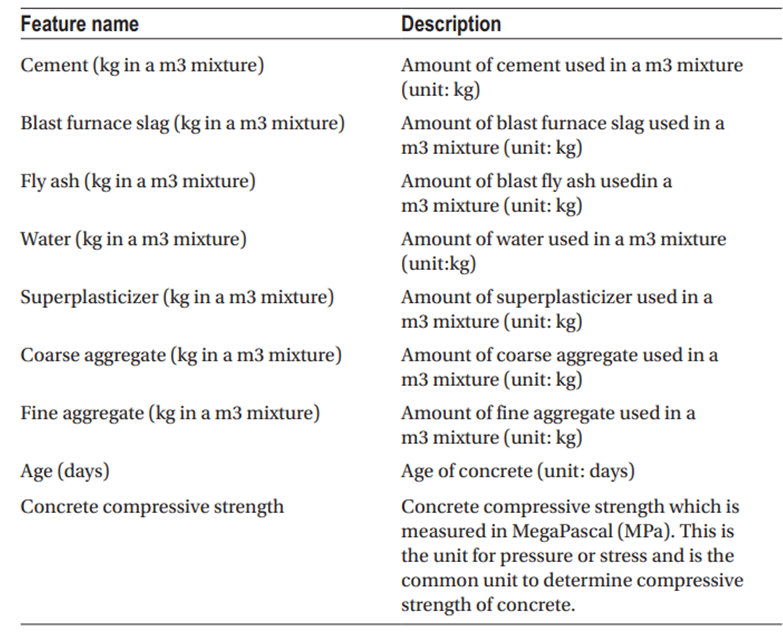

## Data Preprocessing & Data Cleaning

#### Checking the Null Values in the dataset

In [19]:
np.any(df.isnull())

False

#### Checking for the Duplicate values in the dataset

In [20]:
np.any(df.duplicated())

True

In [21]:
len(df[df.duplicated()])

25

In [22]:
df.drop_duplicates(subset=['Cement (component 1)(kg in a m^3 mixture)',
                           'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
                           'Fly Ash (component 3)(kg in a m^3 mixture)',
                           'Water  (component 4)(kg in a m^3 mixture)',
                           'Superplasticizer (component 5)(kg in a m^3 mixture)',
                           'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
                           'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
                           'Concrete compressive strength(MPa, megapascals) '],keep='first', inplace=True)

#### Changing the column name

In [10]:
df.columns = ['Cement', 'Blast Furnance', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete Compressive Strength']

In [24]:
df

,Cement,Blast Furnance,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Compressive Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


### Identifying the Outliers and removing them

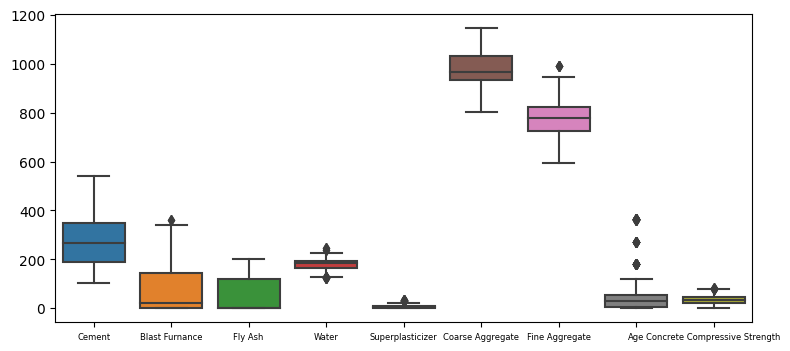

In [25]:
plt.figure(figsize=(9,4))
plt.xticks(fontsize= 6)
sns.boxplot(df)
plt.show()

In [26]:
# Detecting the outliers

Threshold =3

Outliers=df[(np.abs(stats.zscore(df['Water'])) > Threshold) | 
   (np.abs(stats.zscore(df['Blast Furnance']))>Threshold) | 
   (np.abs(stats.zscore(df['Superplasticizer']))>Threshold)|
   (np.abs(stats.zscore(df['Fine Aggregate']))>Threshold)|
   (np.abs(stats.zscore(df['Age']))>Threshold)|
   (np.abs(stats.zscore(df['Concrete Compressive Strength']))>Threshold)]

In [27]:
# Removing Outliers

New_df = df[df.isin(Outliers)==False]
New_df.dropna(inplace=True)

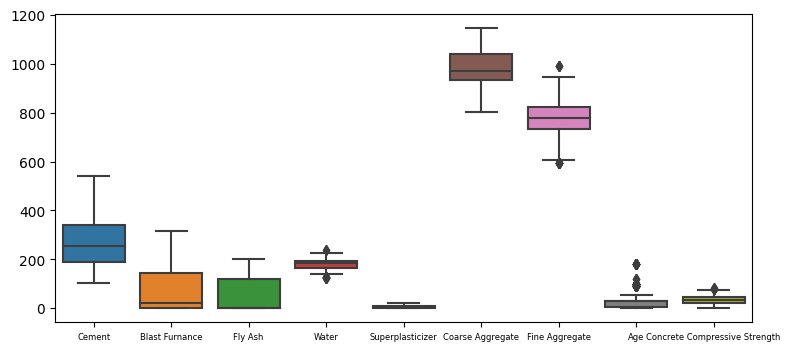

In [28]:
plt.figure(figsize=(9,4))
plt.xticks(fontsize= 6)
sns.boxplot(New_df)
plt.show()

### Key points to be remembered

1. Water/cement ratio - Higher the water - Lower the strength (0.45 to 0.60)

2. SCM - Suplimentary cenmentation materials(When we add Fly ash or , Slica Fume it will affect the compressive strength)

3. Chemical Admixtures - If we add the Superplasticizer it will improve our workability, adding superplasticizer will allows us to decrease the water. Lower water Higher strength.

4. Aggregate - It also effects the compressive strength.

5. High-Strength Concrete: Compressive strength greater than 40 MPa.

7. Normal-Strength Concrete: Compressive strength between 20 MPa and 40 MPa.

8. Low-Strength Concrete: Compressive strength below 20 MPa.


* Water-to-Cement Ratio (w/c) = Total Mass of Water / Total Mass of Cement

* For example, if you have a total mass of water of 162.0 kg and a total mass of cement of 540.0 kg, then the w/c ratio would be:

* w/c ratio = 162.0 kg / 540.0 kg ≈ 0.3

* So, the water-to-cement ratio in this case is approximately 0.3. This means that for every unit of mass of cement, there are approximately 0.3 units of mass of water in the mix.

New Features:

* Strength Class: This feature categorizes the concrete compressive strength into different classes, which will provide a clearer understanding of the strength distribution.

* Water/Cement Ratio: Calculating the water/cement ratio helps in evaluating the impact of this important factor on concrete strength.

* Aggregate/Cement Ratio: The aggregate/cement ratio is another crucial ratio that can influence concrete properties.

* Total Batch Mass: Calculating the total mass of each batch is important for categorizing batch sizes.

* Batch Size Categorization: Categorizing batch sizes based on total mass adds a useful categorical feature that could potentially influence concrete strength.

## Addition of New Features  

#### Strength Class

In [29]:
New_df['Strength Class']  = ['HSC' if i > 40.00 else 'NSC' if i >= 20.00 and i <=40.00 else 'LSC' for i in New_df['Concrete Compressive Strength'].values]
df1=New_df

#### Water / Cement Ratio

In [30]:
df1['Water/Cement Ratio'] = df1['Water']/df1['Cement']

#### Aggregate / Cement Ratio

In [20]:
def function(df1):
    
    Total_Mass_Aggregate = df1['Coarse Aggregate'] + df1['Fine Aggregate']
    
    Total_Mass_Cement = df1['Cement'] + df1['Fly Ash'] + df1['Blast Furnance']  + df1['Superplasticizer']
    
    if Total_Mass_Cement == 0:
        return None
    
    Aggregate_Cement_ratio = Total_Mass_Aggregate/Total_Mass_Cement
    
    return round(Aggregate_Cement_ratio,3)

In [21]:
df1['Aggregate/Cement Ratio'] = df1.apply(function, axis=1)

#### Total Mass

In [42]:
df1['Total Batch Mass'] = df1['Cement'] + df1['Blast Furnance'] + df1['Fly Ash'] + df1['Water'] + df1['Superplasticizer'] + df1['Coarse Aggregate'] + df1['Fine Aggregate']

In [43]:
def function2(df1):
    if df1['Total Batch Mass'] <= 2300.00:
        return 'Small'
    elif df1['Total Batch Mass'] >= 2301.00 and df1['Total Batch Mass'] < 2400.00:
        return 'Medium'
    else:
        return 'Large'

# Apply the function to create a new 'Batch_Size_Category' column
df1['Batch Size Category'] = df1.apply(function2, axis=1)


In [44]:
df1.to_csv('Processed Dataset.csv', index=False)

In [45]:
pd.read_csv('Processed Dataset.csv')

,Cement,Blast Furnance,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Compressive Strength,Strength Class,Water/Cement Ratio,Aggregate/Cement Ratio,Total Batch Mass,Batch Size Category
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99,HSC,0.300000,3.163,2420.5,Large
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89,HSC,0.300000,3.191,2435.5,Large
2,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.03,HSC,0.857143,4.216,2210.0,Small
3,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0,36.45,NSC,0.600000,3.213,2229.0,Small
4,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85,HSC,0.857143,4.216,2210.0,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28,HSC,0.649783,3.333,2309.6,Medium
952,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.18,NSC,0.608318,3.640,2275.5,Small
953,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.70,NSC,1.297643,4.154,2267.7,Small
954,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.77,NSC,1.103708,4.980,2311.2,Medium


### Exploratory Data Analysis:

TODO - Talking about EDA, dataset(source, what it contains, how it will be usefull)

* Public Source

* Information about the Construction Building Material

* Can usefull to understand what are factors involved in this.

In [3]:
df = pd.read_csv('Processed Dataset.csv')

In [47]:
df.head()

,Cement,Blast Furnance,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Compressive Strength,Strength Class,Water/Cement Ratio,Aggregate/Cement Ratio,Total Batch Mass,Batch Size Category
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99,HSC,0.300000,3.163,2420.5,Large
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89,HSC,0.300000,3.191,2435.5,Large
2,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90.0,47.03,HSC,0.857143,4.216,2210.0,Small
3,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28.0,36.45,NSC,0.600000,3.213,2229.0,Small
4,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85,HSC,0.857143,4.216,2210.0,Small


In [48]:
df.describe()

,Cement,Blast Furnance,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Compressive Strength,Water/Cement Ratio,Aggregate/Cement Ratio,Total Batch Mass
count,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000
mean,274.726674,71.138285,58.233787,181.273013,6.014017,976.309205,775.129393,36.412134,34.683849,0.762134,4.533282,2342.824372
std,102.268796,85.033941,64.611140,20.111494,5.410743,77.544025,77.792023,36.980306,16.271342,0.314231,1.224663,62.054323
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000,0.279693,2.362000,2194.600000
25%,190.300000,0.000000,0.000000,166.600000,0.000000,932.000000,734.300000,7.000000,22.885000,0.550143,3.471500,2292.000000
50%,255.150000,20.000000,0.000000,185.000000,6.450000,971.400000,780.100000,28.000000,33.400000,0.703224,4.490000,2348.900000
75%,339.000000,142.500000,118.600000,192.000000,10.000000,1040.150000,822.000000,28.000000,44.405000,0.949856,5.344000,2386.400000
max,540.000000,316.100000,200.100000,237.000000,23.400000,1145.000000,992.600000,180.000000,82.600000,1.882353,9.850000,2551.000000


#### Analysing the Categorical Features

In [49]:
np.round(df['Strength Class'].value_counts(normalize=True) *100, 2)

NSC    45.5
HSC    34.0
LSC    20.5
Name: Strength Class, dtype: float64

In [50]:
np.round(df['Batch Size Category'].value_counts(normalize=True) *100, 2)

Medium    51.88
Small     29.08
Large     19.04
Name: Batch Size Category, dtype: float64

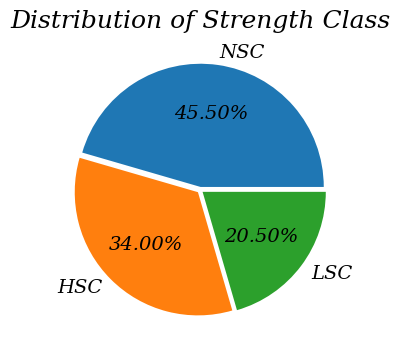

In [51]:
plt.figure(figsize=(4,4))

plt.subplot(1,1,1)

plt.title('Distribution of Strength Class', fontdict={'fontsize': 18, 
                                                     'fontweight': 500,
                                                     'fontfamily': 'serif',
                                                     'fontstyle': 'oblique'})

df_Strength = np.round(df['Strength Class'].value_counts(normalize=True) *100, 2).to_frame()

plt.pie(x=df_Strength['Strength Class'], 
       explode = [0.025, 0.025, 0.025], 
       labels= df_Strength.index,
       autopct='%.2f%%',
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})

plt.show()

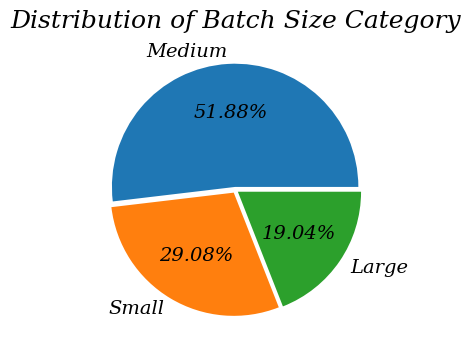

In [52]:
plt.figure(figsize=(4,4))

plt.title('Distribution of Batch Size Category', fontdict={'fontsize': 18, 
                                                     'fontweight': 500,
                                                     'fontfamily': 'serif',
                                                     'fontstyle': 'oblique'})

df_Batch = np.round(df['Batch Size Category'].value_counts(normalize=True) *100, 2).to_frame()

plt.pie(x=df_Batch['Batch Size Category'], 
       explode = [0.025, 0.025, 0.025], 
       labels= df_Batch.index,
       autopct='%.2f%%',
       textprops = {'fontsize' : 14,
                   'fontstyle' : 'oblique',
                   'fontfamily' : 'serif',
                   'fontweight' : 500})

plt.show()

In [53]:
Num_features= df.select_dtypes(include=['float64'], exclude=['object'])

Summary: 

* With the help of some EDA techniques we are able to Visualize that Strength Class and Batch Size Category plays an important role in determining the Concrete compressive strength.

* By analysing Strength Class we found that Normal Strength Concrete has the highest percentage followed by HSC and LSC and Batch Size Category has Medium Batch with higher percentage followed by small and Large.

Implications & Insights:

* The Distribution of strength class is not uniform. with NSC being the most common, followed by HSC and LSC. This indicates that majority of concrete samples falls within NSC and HSC Categories. 

* By Visualizing we can understand that Strength class and Batch Size Category has some association which might be determining the concrete compressive strength.

#### Distribution of Numerical Features

<Figure size 500x300 with 0 Axes>

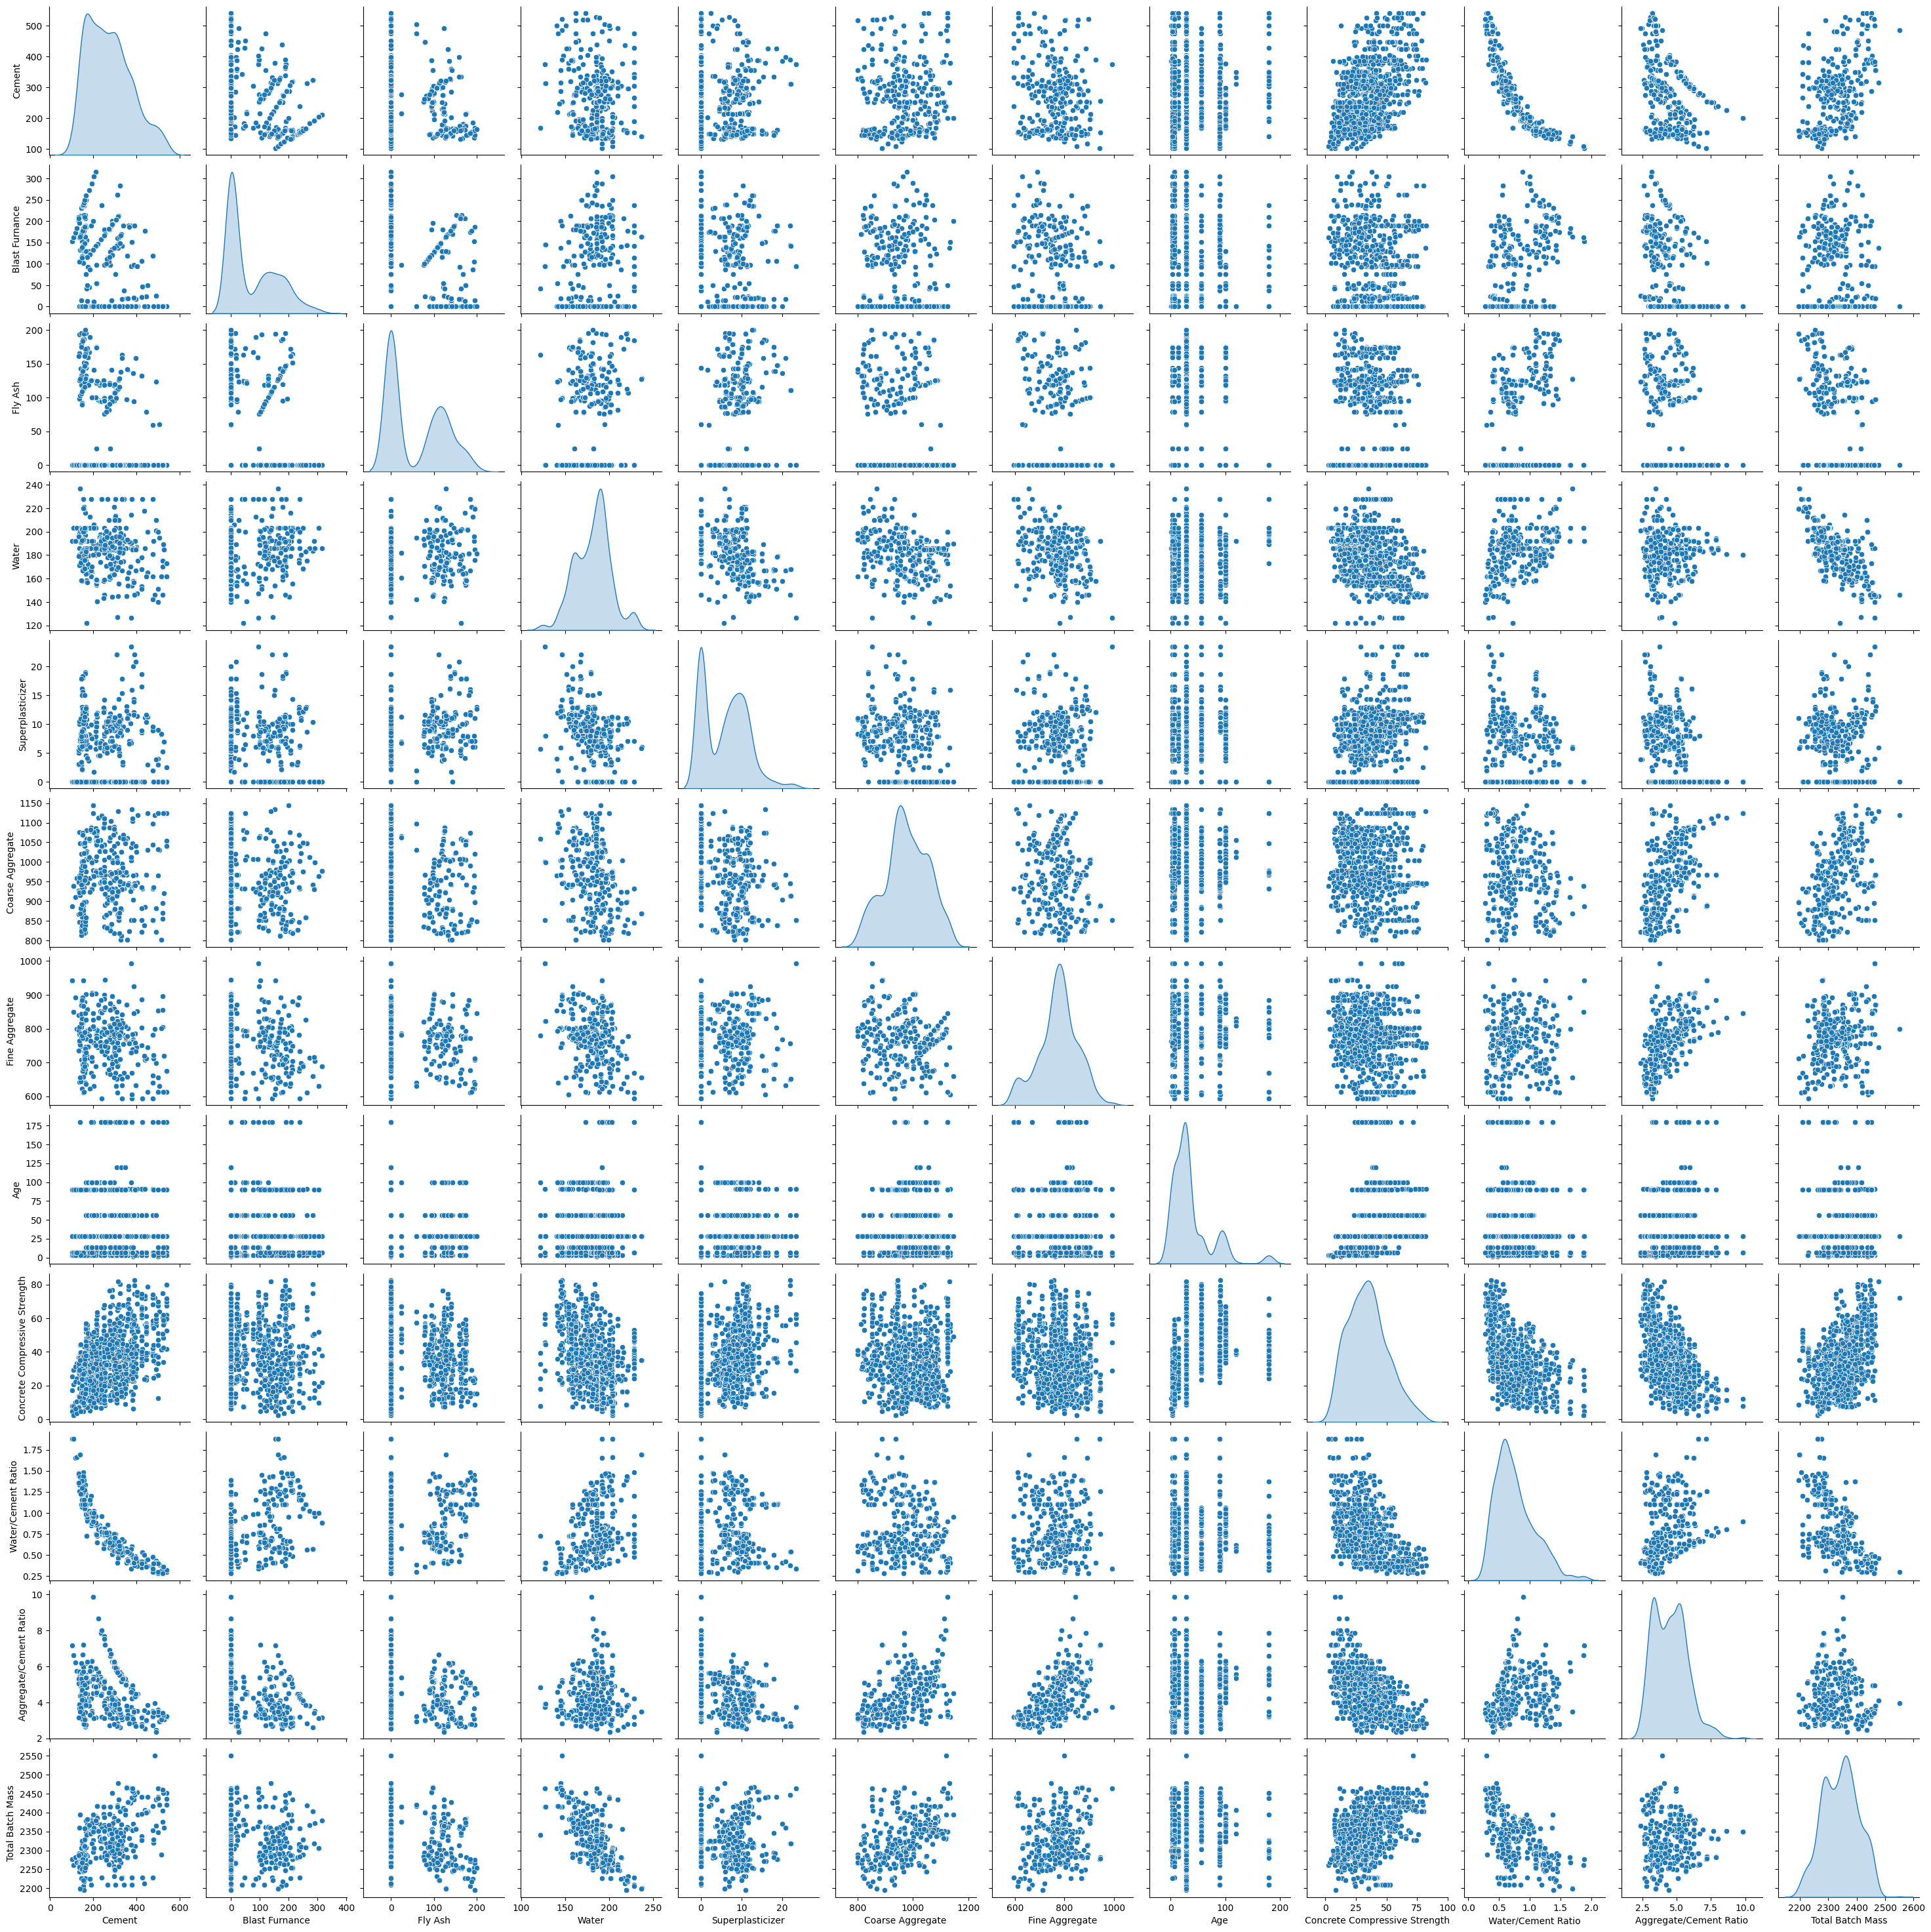

In [54]:
plt.figure(figsize=(5,3))

sns.pairplot(data=Num_features, diag_kind='kde')

plt.show()

## Advanced Analytics

In this section, we will conduct correlation analysis and hypothesis testing to determine if there is a significant relationship between various categories or factors that affects the concrete compressive strength. The purpose is to confirm whether such a relationship truly exists.

### Correlation Using HeatMap


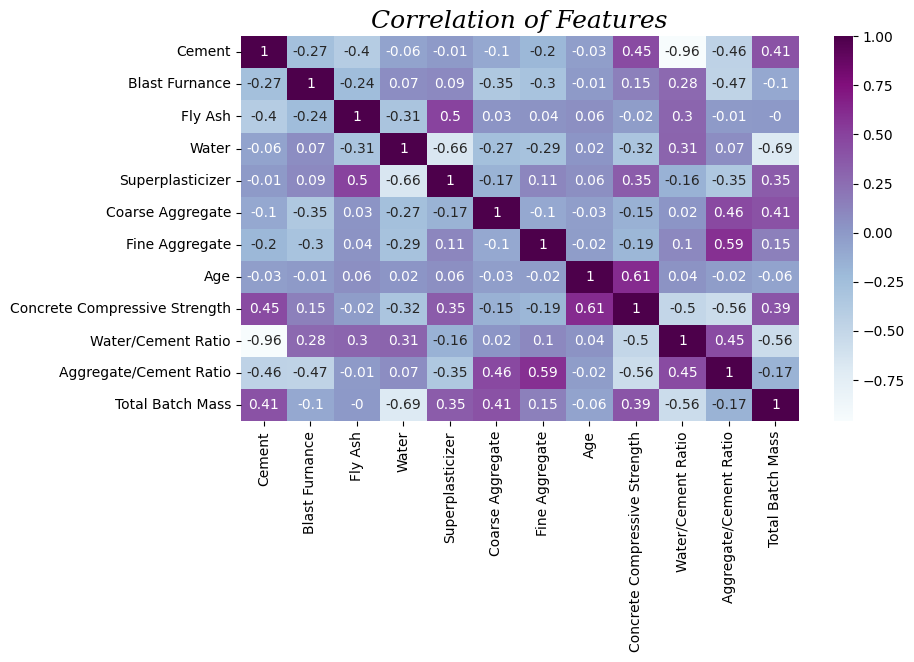

In [55]:
plt.figure(figsize=(9,5))
plt.title('Correlation of Features',fontdict={'fontsize': 18, 
                                                     'fontweight': 300,
                                                     'fontfamily': 'serif',
                                                     'fontstyle': 'oblique'})
sns.heatmap(round(df.corr(method='spearman'),2), annot=True, fmt='.2g', cmap='BuPu')
plt.show()

#### Interpretating the Heatmap for Building Material Dataset.

Here we have summarized only correlation between the numberical variable 

* The Correlation between Concrete Compressive Strength - Cement, Age are registered as Moderate positive linear relationship. This indicates that if the amount of cement or days of Age increase the Concrete Compressive strength increase vise versa. 

* The Correlation between Concrete Compressive Strength - Water/ Cement ratio and  Aggregate / Cement ratio are registed as Moderate Negative Linear relationship. This indicate that if the amount of Water/ cement and Aggregate/ Cement ratio increase the Concrete Compressive strength decreases vise versa.

* The Correlation between Concrete Compressive Strength - Blast Furnance, Superplaticizer, Total Batch Size are registered as Weak positive linear relationship. 

### Hypothesis Testing

* By analysing correlation we are able see that there are potential relationship between variable that impact the Concrete compressive strength. as we know by correlation we are able to get only the rough idea about the association between these variable. But it is time to do some Hypothesis testing.

* Hypothesis testing allows us to find the probability that identified relationships hold true in the large population. we can also determine if some of the features may impact the concrete compressive strength which helps us to draw the conclusions and make informed decisions regarding the factors influencing the concrete compressive strength which leads to inconsitency in the Quality of concrete

### Correlation Test

#### 1. Does cement really impact the concrete Compressive strength, what kind of relationship does it for the entire Population

### Defining Null and Alternative Hypothesis

Null Hypothesis (H0) : There is no correlation between the Concrete Compressive strength and Cement (rho = 0)

Alternate Hypothesis (H1) : There is correlation between the Concrete Compressive strength and Cement (rho !=0)

### Pearsonr Correlation Test

In [143]:
t_statistics, pvalue = stats.pearsonr(df['Cement'], df['Concrete Compressive Strength'])

print('Tstatistics: ', t_statistics,'\n','Pvalue: ', pvalue)

if pvalue < 0.05:
    print('Reject the Null Hypothesis')
else:
    print('Failed to Reject the Null Hypothesis')

Tstatistics:  0.47275463118380845 
 Pvalue:  2.1584622648324074e-54
Reject the Null Hypothesis


### Interpretation: 

We can conclude that there is statistical evidence that cement and Concrete compressive strength are correlating each other. It is an important factor in determining the concrete compressive strength.

#### 2. Is Age of Concrete really impact the concrete Compressive strength, what kind of relationship does it can interpret for the entire Population

### Defining Null and Alternative Hypothesis

Null Hypothesis (H0) : There is no correlation between the Concrete Compressive strength and Age (rho = 0)

Alternate Hypothesis (H1) : There is correlation between the Concrete Compressive strength and Age (rho !=0)

### Pearsonr Correlation Test

In [144]:
t_statistics, pvalue = stats.pearsonr(df['Age'], df['Concrete Compressive Strength'])

print('Tstatistics: ', t_statistics,'\n','Pvalue: ', pvalue)

if pvalue < 0.05:
    print('Reject the Null Hypothesis')
else:
    print('Failed to Reject the Null Hypothesis')

Tstatistics:  0.4363668577995356 
 Pvalue:  1.0261601529820244e-45
Reject the Null Hypothesis


### Interpretation:
We can conclude that there is statistical evidence that Age of concrete and Concrete compressive strength are correlating each other. When Age of concrete is increase the concrete compressive strength increases. 

In [11]:
t_statistics, pvalue = stats.pearsonr(df['Fly Ash'], df['Concrete Compressive Strength'])

print('Tstatistics: ', t_statistics,'\n','Pvalue: ', pvalue)

if pvalue < 0.05:
    print('Reject the Null Hypothesis')
else:
    print('Failed to Reject the Null Hypothesis')

Tstatistics:  -0.10575491629731326 
 Pvalue:  0.000675158355575497
Reject the Null Hypothesis


In [4]:
t_statistics, pvalue = stats.pearsonr(df['Fly Ash'], df['Concrete Compressive Strength'])

print('Tstatistics: ', t_statistics,'\n','Pvalue: ', pvalue)

if pvalue < 0.05:
    print('Reject the Null Hypothesis')
else:
    print('Failed to Reject the Null Hypothesis')

Tstatistics:  -0.05197335918288974 
 Pvalue:  0.10828263351532483
Failed to Reject the Null Hypothesis


### 3. Does Water/Cement ratio impact the concrete Compressive strength, does it affect the concrete compressive strength ?

#### Defining Null and Alternative Hypothesis
Null Hypothesis (H0) : There is no correlation between the Concrete Compressive strength and Water/Cement ratio (rho = 0)

Alternate Hypothesis (H1) : There is correlation between the Concrete Compressive strength and Water/Cement ratio (rho !=0)

### Pearsonr Correlation Test

In [4]:
t_statistics, pvalue = stats.pearsonr(df['Water/Cement Ratio'], df['Concrete Compressive Strength'])

print('Tstatistics: ', t_statistics,'\n','Pvalue: ', pvalue)

if pvalue < 0.05:
    print('Reject the Null Hypothesis')
else:
    print('Failed to Reject the Null Hypothesis')

Tstatistics:  -0.48488435191433454 
 Pvalue:  1.5881646160717522e-57
Reject the Null Hypothesis


Interpretation:
 There is statistical evidence that Water/ cement ratio and Concrete compressive strength are correlating each other. When amount of water is increasing   concrete compressive strength decreases.

#### 1. Smith wants to compare mean of concrete compressive strength of three strength class, To determine whether there is a significant difference between the mean of concrete compressive strength and three strength class based on confidence interval of 95 %.

### Defining Null and Alternative Hypothesis

Null Hypothesis  (H0) : There is no significant difference between the concrete compressive strength and strength class.
    
Alternate Hypothesis (H1) : There is a significant difference between the concrete compressive strength and strength class.

### Checking for Basic Assumptions for the Hypothesis

* Distribution check using QQ plot
* Homogeneity of Variance using Levene's Test

### Define Test statistics 

If the assumptions are met we can perform One Way ANOVA. Or else we need to perform Non parametric test called Kruskall Walis.

### Compute Pvalue and Alpha

pval > Alpha : Accept H0

pval < Alpha : Reject H0

In [28]:
df.groupby(by='Strength Class')['Concrete Compressive Strength'].describe()

,count,mean,std,min,25%,50%,75%,max
Strength Class,,,,,,,,
HSC,325.0,52.851877,10.198811,40.06,44.2800,50.95,59.0000,82.60
LSC,196.0,13.528571,3.929478,2.33,10.6825,13.64,16.8825,19.99
NSC,435.0,30.642069,5.685747,20.08,25.4700,31.35,35.3400,39.94


In [64]:
HSC = df['Concrete Compressive Strength'][df['Strength Class'] == 'HSC']
NSC = df['Concrete Compressive Strength'][df['Strength Class'] == 'NSC']
LSC = df['Concrete Compressive Strength'][df['Strength Class'] == 'LSC']

#### Visual Test to know if the samples folow normal Distritribution or not

[]

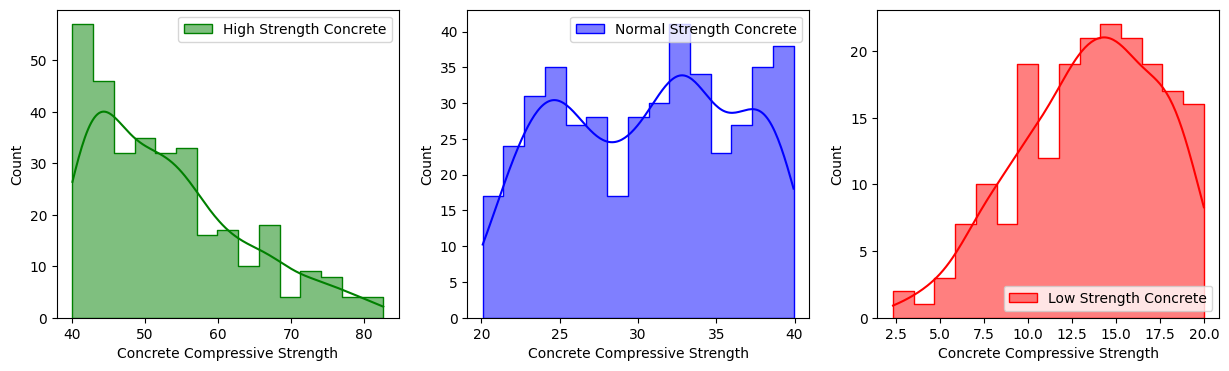

In [67]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 3, 1)
sns.histplot(HSC,bins = 15, 
             element = 'step', color = 'green', kde = True, label = 'High Strength Concrete')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(NSC, bins = 15,
             element = 'step', color = 'blue', kde = True, label = 'Normal Strength Concrete')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(LSC, bins = 15,
             element = 'step', color = 'red', kde = True, label = 'Low Strength Concrete')
plt.legend()
plt.plot()

* We can infer from the above plot that the distribution do not folow normal Distribution

#### Distribution check using QQ plot

[]

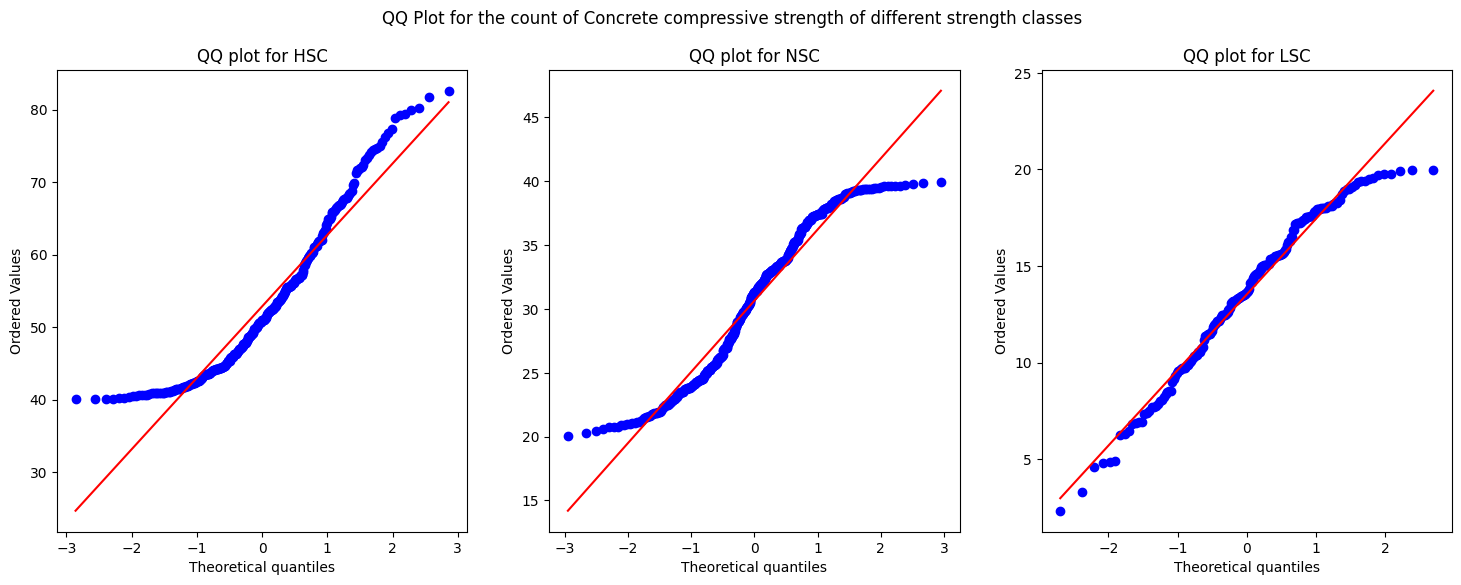

In [68]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.suptitle('QQ Plot for the count of Concrete compressive strength of different strength classes')
stats.probplot(HSC, plot=plt, dist='norm')
plt.title('QQ plot for HSC')

plt.subplot(1,3,2)
stats.probplot(NSC, plot=plt, dist='norm')
plt.title('QQ plot for NSC')

plt.subplot(1,3,3)
stats.probplot(LSC, plot=plt, dist='norm')
plt.title('QQ plot for LSC')
plt.plot()

It can be seen that from the above plot that the distribution does not folow normal distribution

#### Applying Shapiro Wink test for test of Normality

H0: The Sample folow normal Distribution

H1: The Sample doent follow normal Distribution

In [69]:
t_statistics, pvalue = stats.shapiro(HSC)
print('Pvalue', pvalue)

if pvalue < 0.05:
    print('The Sample doent follow normal Distribution')
else:
    print('The Sample folow normal Distribution')

Pvalue 3.69332646063536e-12
The Sample doent follow normal Distribution


In [70]:
t_statistics, pvalue = stats.shapiro(NSC)
print('Pvalue', pvalue)

if pvalue < 0.05:
    print('The Sample doent follow normal Distribution')
else:
    print('The Sample folow normal Distribution')

Pvalue 5.6043867463495545e-11
The Sample doent follow normal Distribution


In [71]:
t_statistics, pvalue = stats.shapiro(LSC)
print('Pvalue', pvalue)

if pvalue < 0.05:
    print('The Sample doent follow normal Distribution')
else:
    print('The Sample folow normal Distribution')

Pvalue 0.0007378936279565096
The Sample doent follow normal Distribution


### Homogeneity of Varaince using Levene's Test

Null Hypothesis (H0) : Homogenous Variance
    
Alternative Hypothesis (H1): Non Homogenous Variance

In [77]:
t_statistics, p_value = stats.levene(HSC, NSC, LSC)

print('Pvalue', p_value)

if pvalue < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The sample have Homogenous Variance')

Pvalue 1.7725403941009535e-36
The samples do not have Homogenous Variance


As we are able to see that samples are not normally distributed and do not have same variance. One way ANOVA can't be performed here, we can perform Non parametric test called Kruskall Wallis test of Independent Samples

### Kruskall Wallis Test of independence

Null Hypothesis (H0) : Median of Concrete Compressive Strength is same for different Strength Class
    
Alternate Hypothesis (H1) : Median of Concrete Compressive Strength is different for different Strength Class

In [84]:
t_statistics, pvalue = stats.kruskal(HSC, NSC, LSC)

print('Tstatistics: ', t_statistics,'\n','Pvalue: ', pvalue)

if pvalue < 0.05:
    print('Reject the Null Hypothesis')
else:
    print('Failed to Reject the Null Hypothesis')

Tstatistics:  819.280663624289 
 Pvalue:  1.2458459047856615e-178
Reject the Null Hypothesis


Therefore the Median number of Concrete compressive strength is statistically different from different Strength Class

Inferences:

Bassed on the analysis of the concrete compressive strength among different strength classes, we have identified that there are significant differences in the distribution of Concrete Compressive strength among the strength classes(HSC, NSC, LSC). This could be the a contibuting factor to the inconsistency in concrete quality. Smith could investigate the factors that leads to these differences and work towards standardizing the concrete mixture to ensure more consistent Quality accross all strength class.